# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.



In [1]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [2]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.082535326 W= 0.291411 b= 0.500637
Epoch: 0100 cost= 0.081891939 W= 0.288924 b= 0.518529
Epoch: 0150 cost= 0.081322990 W= 0.286585 b= 0.535357
Epoch: 0200 cost= 0.080819920 W= 0.284384 b= 0.551183
Epoch: 0250 cost= 0.080375068 W= 0.282315 b= 0.56607
Epoch: 0300 cost= 0.079981707 W= 0.280369 b= 0.58007
Epoch: 0350 cost= 0.079633936 W= 0.278539 b= 0.593238
Epoch: 0400 cost= 0.079326443 W= 0.276817 b= 0.605624
Epoch: 0450 cost= 0.079054587 W= 0.275198 b= 0.617272
Epoch: 0500 cost= 0.078814276 W= 0.273675 b= 0.628227
Epoch: 0550 cost= 0.078601830 W= 0.272243 b= 0.638529
Epoch: 0600 cost= 0.078414015 W= 0.270896 b= 0.648219
Epoch: 0650 cost= 0.078247964 W= 0.269629 b= 0.657334
Epoch: 0700 cost= 0.078101203 W= 0.268437 b= 0.665906
Epoch: 0750 cost= 0.077971481 W= 0.267317 b= 0.673968
Epoch: 0800 cost= 0.077856824 W= 0.266263 b= 0.68155
Epoch: 0850 cost= 0.077755496 W= 0.265271 b= 0.688682
Epoch: 0900 cost= 0.077665910 W= 0.264339 b= 0.69539
Epoch: 0950 cost= 0.077586755 W=

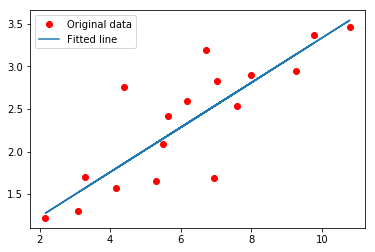

In [9]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

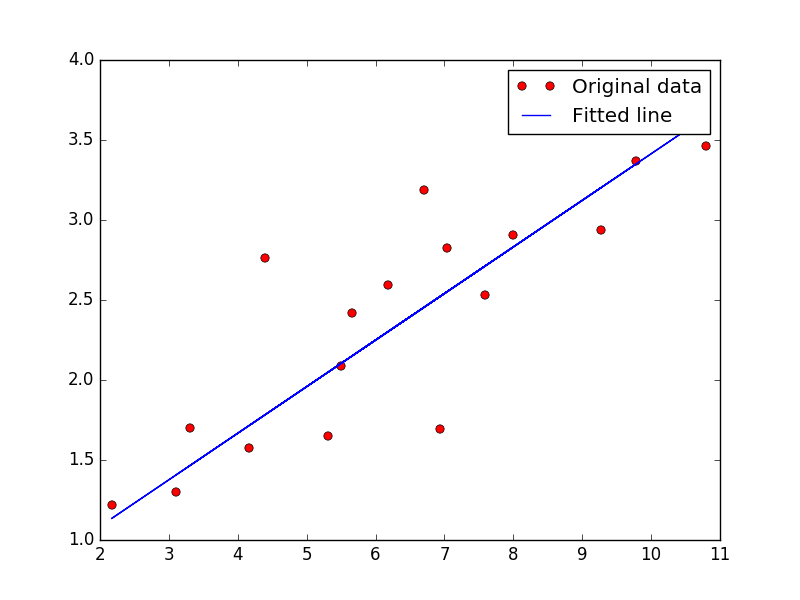

In [1]:
# Regression result